What are the most optimal skills to learn for data analysts?

In [60]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


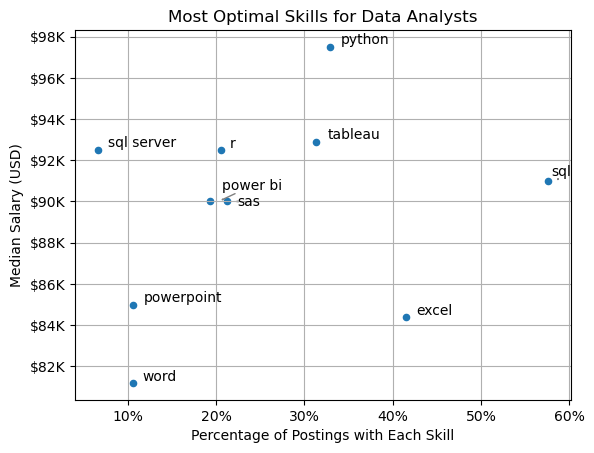

In [80]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_gb = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_gb.sort_values(by='count', ascending=False, inplace=True)
job_total = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
job_total = job_total.dropna(subset=['salary_year_avg'])
job_total = job_total['job_title_short'].count()
df_DA_US_gb['percentage'] = df_DA_US_gb['count'].apply(lambda x: (x/job_total)*100)

df_DA_US_gb.rename(columns=({'count': 'skill_count', 'median' : 'median salary'}), inplace=True)
df_DA_US_gb.head(10).plot(kind = 'scatter', x='percentage', y= 'median salary')

top_10 = list(df_DA_US_gb.head(10).index)
texts = []
from adjustText import adjust_text

for i, skill in enumerate(top_10):
    df2 = df_DA_US_gb.iloc[i]
    texts.append(plt.text(df2['percentage']+1, df2['median salary'], skill))
    
adjust_text (texts, arrowprops = dict(arrowstyle = '->', color = 'grey'))

plt.title('Most Optimal Skills for Data Analysts')
plt.xlabel('Percentage of Postings with Each Skill')
plt.ylabel('Median Salary (USD)')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))
plt.grid()